<h1 style="text-align:center;">Analysis</h1>


After cleaning the csv about sales data according to our wishes, we can read it in, to pursue our further analysis. But first, we have to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/cleaned/clean_data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


Now, we are able to calculate important KPIs and plot them, as a basis for our insights and recommendations for action.

---

## We start with monthly revenues over the years.

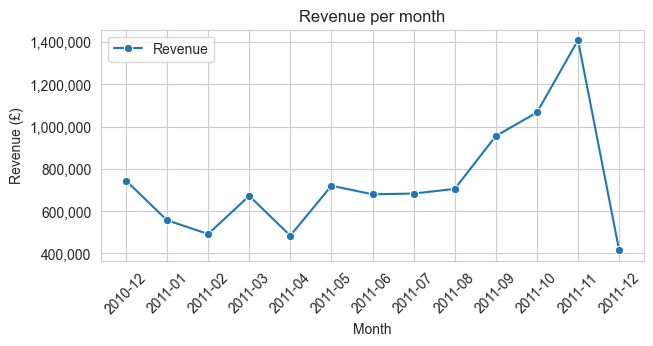

In [3]:
monthly_revenue = (
    df.groupby('YearMonth')['Revenue']
      .sum()
      .sort_index()
)

# Plot the new dataframe
plt.figure(figsize=(7,3))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker="o", label="Revenue")
plt.xticks(rotation=45)

plt.title("Revenue per month")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()

We can see that the revenue rose steadily over time, until it reached its peak in November 2011 and then fell dramatically.

---

## The top 10 products that generated the most revenue:

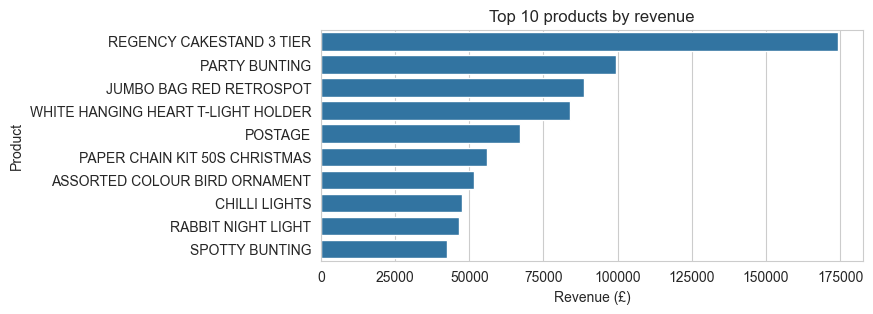

In [4]:
top_products = (
    df.groupby('Description')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Plot the new dataframe
plt.figure(figsize=(7,3))
sns.barplot(x=top_products.values, y=top_products.index)

plt.title("Top 10 products by revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Product")

plt.show()

We see that "Regency Cakestand 3 Tier" generates by far the most revenue, and places 2 to 4 are very close together.

---

## The top 10 customers who generated the most revenue:

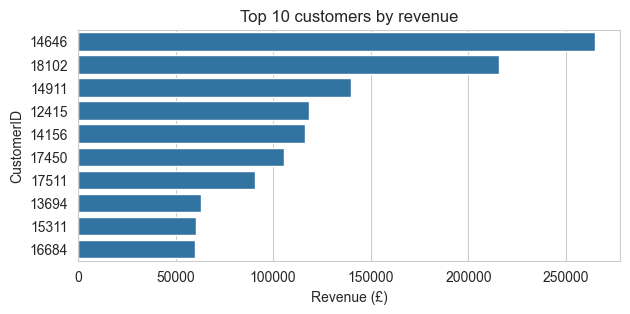

In [5]:
top_customers = (
    df[df['CustomerID'] != 0] #Without anonymous customers
    .groupby('CustomerID')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot the new dataframe
plt.figure(figsize=(7,3))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))

plt.title("Top 10 customers by revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("CustomerID")

plt.show()

It is evident that places 1 and 2 generated by far the most revenue.

---

## The revenue generated by anonymous orders:

In [6]:
anon_revenue = df[df['CustomerID'] == 0]['Revenue'].sum()
anon_revenue

1523382.4100000001

We can see that the revenue by anonymous customers plays a significant role for the overall analysis.

---

## The top 10 countries by revenue:

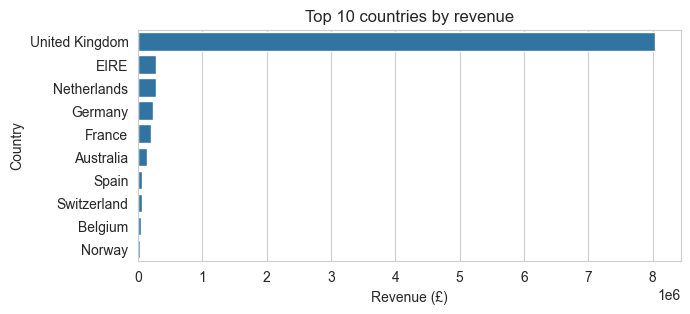

In [7]:
revenue_per_country = (
    df.groupby('Country')['Revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# Plot the new dataframe
plt.figure(figsize=(7,3))
sns.barplot(x=revenue_per_country.values, y=revenue_per_country.index)

plt.title("Top 10 countries by revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Country")

plt.show()

The United Kingdom generates by far the largest revenue, while Ireland and the Netherlands, in second and third place respectively,
do not generate significant revenue but are still important in comparison to other countries. Since UK generates the most revenue by far, it is worth taking a closer look into the UK-market:

In [8]:
df_uk = df[df["Country"] == "United Kingdom"]

Now, we can check which products are particulary popular in UK, to increase advertising and stock levels for these products.

In [9]:
uk_top_products = (
    df_uk
    .groupby("Description")["Revenue"]
    .sum()
    .reset_index()
    .sort_values(by="Revenue", ascending=False)
    .head(3)
)

uk_top_products

,Description,Revenue
2811,REGENCY CAKESTAND 3 TIER,141996.09
2378,PARTY BUNTING,93599.43
1786,JUMBO BAG RED RETROSPOT,80731.10


The article "REGENCY CAKESTAND 3 TIER" generates by far the most revenue. Let's now look at the revenue this product has generated over time and work out trends, using linear regression.

In [10]:
# Filter by the article "REGENCY CAKESTAND 3 TIER"
df_regency_uk = df_uk[df_uk["Description"] == "REGENCY CAKESTAND 3 TIER"]

# Calculate monthly revenue by this product
monthly_regency = (
    df_regency_uk
    .groupby("YearMonth")["Revenue"]
    .sum()
    .reset_index()
)

Then we can define the x and y axes for our regression.

In [11]:
# X = Dates as number
X = np.arange(len(monthly_regency))

# Y = Revenue
Y = monthly_regency["Revenue"].values

# slope and axis section
m, b = np.polyfit(X, Y, 1)

# Trend line for 18 months
X = np.arange(19)
Y_trend = m * X + b

After defining the trend line, we can plot the forecast

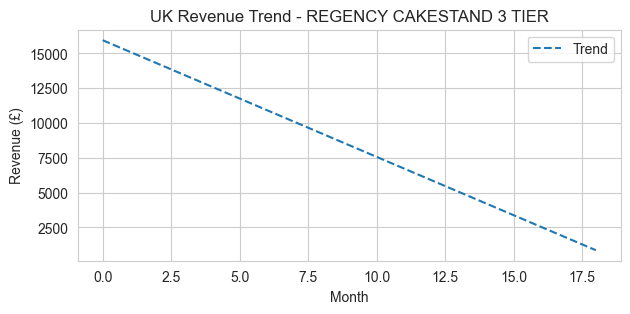

In [12]:
plt.figure(figsize=(7,3))
plt.plot(X, Y_trend, linestyle="--", label="Trend")

plt.title("UK Revenue Trend - REGENCY CAKESTAND 3 TIER")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")

plt.legend()
plt.grid(True)

The graph shows that sales of this popular product have declined significantly over time in UK and sales will fall even further in the next 6 months, if no action is taken. Now we can look which products are frequently purchased across multiple orders and not just generate high sales in single orders.

In [13]:
df_uk["Description"].value_counts(ascending=False).head(5)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2208
JUMBO BAG RED RETROSPOT               1951
REGENCY CAKESTAND 3 TIER              1701
PARTY BUNTING                         1607
LUNCH BAG RED RETROSPOT               1409
Name: count, dtype: int64

It is evident, that although "REGENCY CAKESTAND 3 TIER" generates the most revenue, "WHITE HANGING HEART T-LIGHT HOLDER" is more popular across different orders.

---

## The top 10 customers with the highest average revenue:

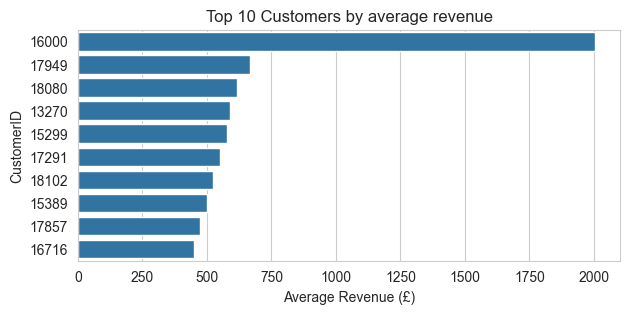

In [14]:
avg_revenue_per_customer = (
    df[df['CustomerID'] != 0] #Without anonymous customers
      .groupby('CustomerID')['Revenue']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Plot the new dataframe
plt.figure(figsize=(7,3))
sns.barplot(x=avg_revenue_per_customer.values, y=avg_revenue_per_customer.index.astype(str))

plt.title("Top 10 Customers by average revenue")
plt.xlabel("Average Revenue (£)")
plt.ylabel("CustomerID")

plt.show()

These are customers who not only place large individual orders but also generate high revenue across multiple orders. Customer 16000 is the clear number 1.

---

## The number of orders per month:

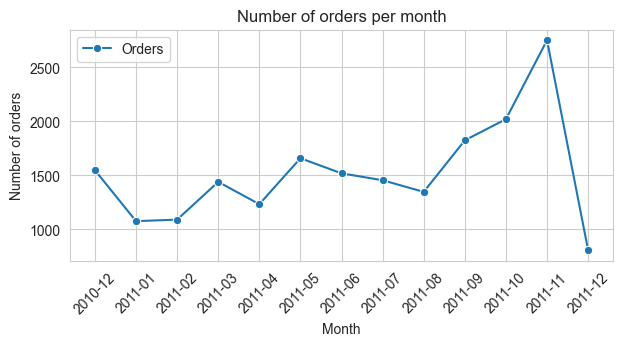

In [15]:
orders_per_month = (
    df.groupby('YearMonth')['InvoiceNo']
      .nunique()  
      .sort_index()
)

# Plot the new dataframe
plt.figure(figsize=(7,3))
sns.lineplot(x=orders_per_month.index.astype(str), y=orders_per_month.values, marker="o", label="Orders")
plt.xticks(rotation=45)

plt.title("Number of orders per month")
plt.xlabel("Month")
plt.ylabel("Number of orders")

plt.show()

The order patterns are very similar to the sales patterns, suggesting a causal relationship.

---

## The average revenue per order:

In [16]:
avg_revenue_per_order = (
    df.groupby('InvoiceNo')['Revenue']
      .sum()
      .mean()
)
avg_revenue_per_order

484.7323771810044

We see that the average revenue per order is very high, which suggests that companies placing large orders are also using the market.

---

## Recommendations for action

To avoid a repeat of the decline in orders seen from November to December 2011, several courses of action may be recommended.
Marketing efforts should be present even in strong months, particularly in countries like the UK and Ireland, to target wholesalers who also place large orders.<br> Furthermore, targeted offers and discounts can attract the top 10 users with the highest average revenue, like user 1600 or user 14646, who generate especially high revenue. The product range and advertisement for products such as "Party Bunting" or "Jumbo bag red retrospot" should also be increased. <br>Marketing for "Regency Cakestand 3 Tier" and "WHITE HANGING HEART T-LIGHT HOLDER" should be significantly increased, especially in the UK, as they are very popular there. In the further course of the process, the purchasing behavior of top customers can be analyzed in order to create personalized advertising or we can compare the purchasing activity between different countries.